In [ ]:
import numpy as np                                          # numpy => numeric library for scientific data to be processed (numerical python)
import pandas as pd                                         # pandas => library used for data manipulation (filtrare, sortare, agregare)
import matplotlib.pyplot as plt                             # graphic library (asemanator cu matlab)
from mpl_toolkits.mplot3d import Axes3D                     
from sklearn.preprocessing import MinMaxScaler              # scaler used to normate data from -1 to 1
from sklearn.model_selection import train_test_split    

The data is taken from https://archive.ics.uci.edu/dataset/846/accelerometer
I will use the dataset to determin if and when a cooler fan with weights on its blades will fail due to the vibrations from the mass distributed weights.

wconfig: 1 - weights on 2 neighboring blades
         2 - weights at a 90 degrees angle
         3 - weights at on opposite blades

pctid: speed of the fan (from 20% power to 100%)

x & y & z: data from vibrations measured

In [2]:
data = pd.read_csv("accelerometer.csv")    # reading the full data
print(data)

        wconfid  pctid      x      y      z
0             1     20  1.004  0.090 -0.125
1             1     20  1.004 -0.043 -0.125
2             1     20  0.969  0.090 -0.121
3             1     20  0.973 -0.012 -0.137
4             1     20  1.000 -0.016 -0.121
...         ...    ...    ...    ...    ...
152995        3    100  1.051  0.090 -0.262
152996        3    100  0.918  0.039 -0.129
152997        3    100  1.156 -0.094 -0.227
152998        3    100  0.934  0.203 -0.172
152999        3    100  1.199 -0.176  0.109

[153000 rows x 5 columns]


In [ ]:
data.info()             # searching for null data if there are any

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153000 entries, 0 to 152999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   wconfid  153000 non-null  int64  
 1   pctid    153000 non-null  int64  
 2   x        153000 non-null  float64
 3   y        153000 non-null  float64
 4   z        153000 non-null  float64
dtypes: float64(3), int64(2)
memory usage: 5.8 MB


array([[<Axes: title={'center': 'wconfid'}>,
        <Axes: title={'center': 'pctid'}>],
       [<Axes: title={'center': 'x'}>, <Axes: title={'center': 'y'}>],
       [<Axes: title={'center': 'z'}>, <Axes: >]], dtype=object)

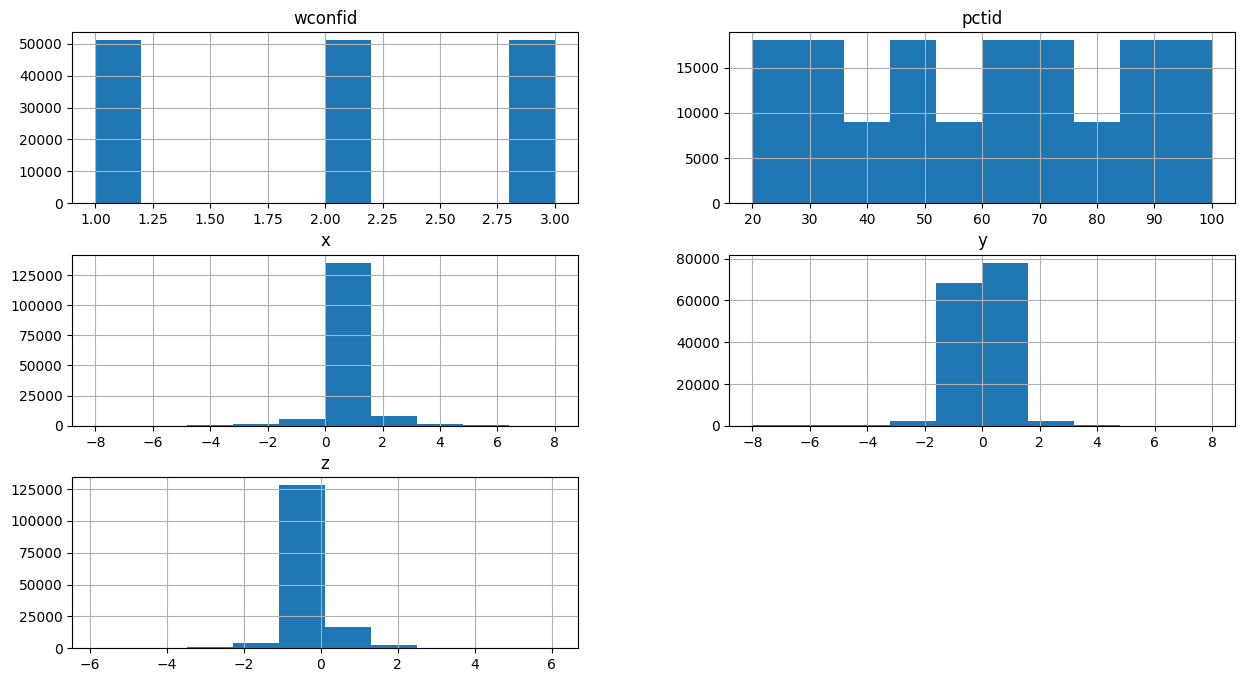

In [ ]:
data.hist(figsize=(15,8))           # plots to see all the data read

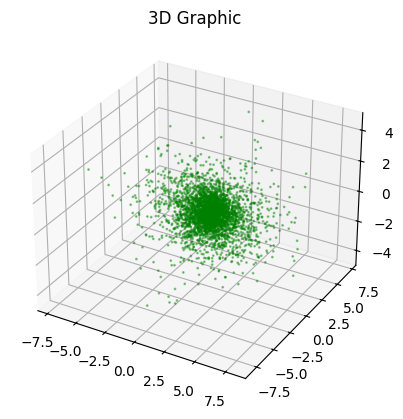

In [5]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')                                                          # matplot has only XoY, I add the Z as well with projection

data_sampled = data.sample(frac=0.1)                                                                # I keep only 10% of the data
ax.scatter(data_sampled['x'], data_sampled['y'], data_sampled['z'], c='green', s=1, alpha=0.4)      # s = size; alpha = transparancy
ax.set_title("3D Graphic")
plt.show()

In [6]:
data['vibration'] = np.sqrt(data['x']**2 + data['y']**2 + data['z']**2)                                                                     # formula for calculating vibrations

scaler = MinMaxScaler()                                                                                                                     # scaler between 0 and 1
data_scaled = pd.DataFrame(scaler.fit_transform(data[['vibration', 'wconfid', 'pctid']]), columns=['vibration', 'wconfid', 'pctid'])        # take and convert just the 3 columns

data_scaled['wear_score'] = 0.5 * data_scaled['vibration'] + 0.3 * data_scaled['wconfid'] + 0.2 * data_scaled['pctid']                      # came with this formula of the wear based on the 3 main factors
data_scaled['time_till_death']=(1-data_scaled['wear_score'])* np.random.uniform(100, 200)                                                   # same with the time until it fails
print(data_scaled)

        vibration  wconfid  pctid  wear_score  time_till_death
0        0.095588      0.0    0.0    0.047794       102.758940
1        0.095283      0.0    0.0    0.047642       102.775398
2        0.092116      0.0    0.0    0.046058       102.946302
3        0.092315      0.0    0.0    0.046157       102.935584
4        0.094764      0.0    0.0    0.047382       102.803403
...           ...      ...    ...         ...              ...
152995   0.102631      1.0    1.0    0.551315        48.420586
152996   0.086888      1.0    1.0    0.543444        49.270052
152997   0.112026      1.0    1.0    0.556013        47.913633
152998   0.091175      1.0    1.0    0.545588        49.038701
152999   0.115482      1.0    1.0    0.557741        47.727140

[153000 rows x 5 columns]


<Axes: >

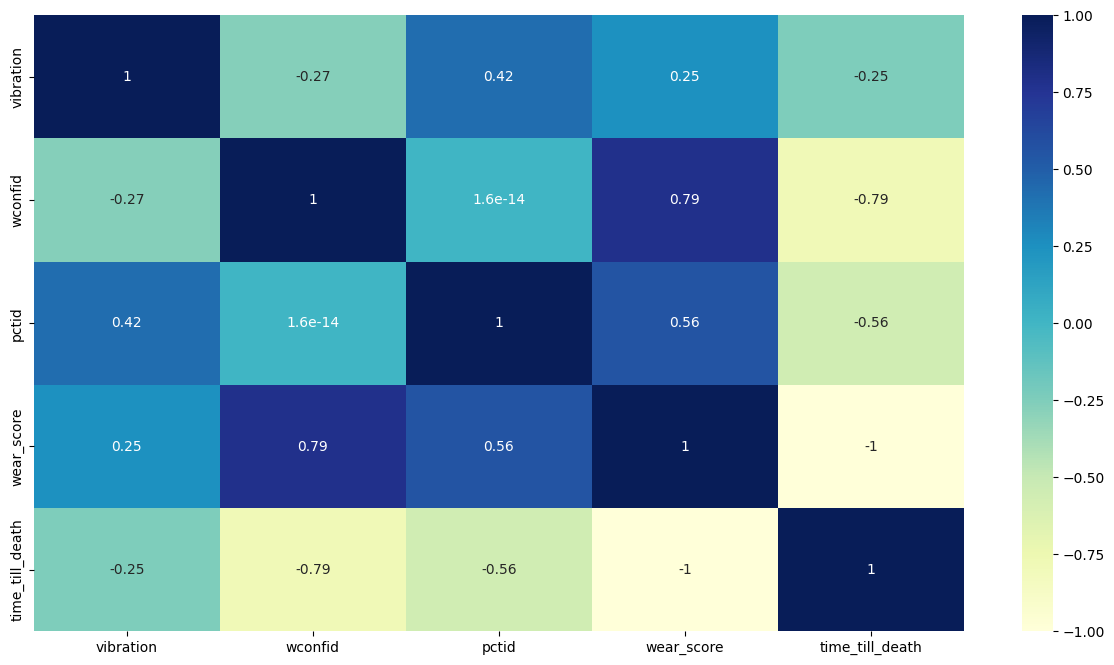

In [21]:
import seaborn as sns                                           # seaborn => library used to visualise the data

plt.figure(figsize=(15,8))
sns.heatmap(data_scaled.corr(), annot= True,cmap="YlGnBu")      # if one column has power over any other column, there will be a normate value

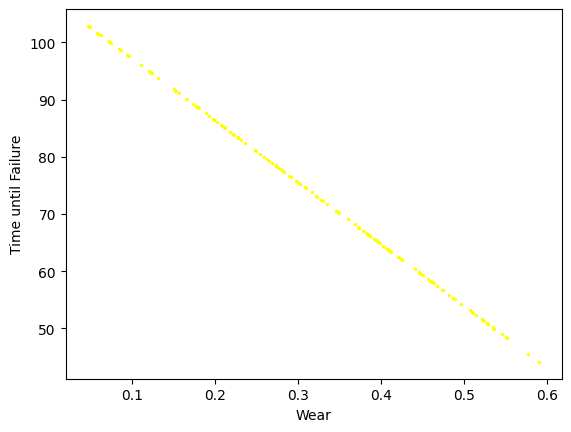

        wear_score  time_till_death
0         0.047794       102.758940
1         0.047642       102.775398
2         0.046058       102.946302
3         0.046157       102.935584
4         0.047382       102.803403
...            ...              ...
152995    0.551315        48.420586
152996    0.543444        49.270052
152997    0.556013        47.913633
152998    0.545588        49.038701
152999    0.557741        47.727140

[153000 rows x 2 columns]


In [ ]:
print_needed_data = pd.DataFrame(data_scaled, columns=['wear_score', 'time_till_death'])                                        # simplified the data I need for my graph
scatter_sampled = print_needed_data.sample(frac=0.001)                                                                          # I keep only 0.1% of the data

plt.scatter(scatter_sampled['wear_score'],scatter_sampled['time_till_death'], color='yellow', s=2)                              # (scatter = diagrama de dispersie)

plt.xlabel("Wear")
plt.ylabel("Time until Failure")
plt.show()
print(print_needed_data)

In [9]:
train_data, valid_data, test_data = np.split(data_scaled.sample(frac=1), [int (0.4*len(data_scaled)),int (0.7*len(data_scaled))])

# 40% of the data will be the training data
# from 40% to 70% (30%) will be my validation data
# the rest of 30% will be the testing data

print(train_data)

        vibration  wconfid   pctid  wear_score  time_till_death
37111    0.045998      0.0  0.7500    0.172999        89.247262
116501   0.094132      1.0  0.2500    0.397066        65.066658
54545    0.093785      0.5  0.0625    0.209392        85.319780
2592     0.097408      0.0  0.0000    0.048704       102.660737
135082   0.100770      1.0  0.6875    0.487885        55.265759
...           ...      ...     ...         ...              ...
94227    0.266132      0.5  0.8750    0.458066        58.483756
7334     0.095546      0.0  0.1250    0.072773       100.063283
31869    0.122241      0.0  0.6250    0.186121        87.831201
56261    0.095743      0.5  0.0625    0.210371        85.214128
14163    0.097758      0.0  0.2500    0.098879        97.246023

[61200 rows x 5 columns]


/usr/local/lib/python3.10/dist-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


The best algorithm for this type of problem is Neural Network, because we do not have the time until failure measured. So it is not a regression or a classification problem, to have an output known.
For this solution, I will use TensorFlow, because it is an open source library with the hidden layers already trained.

In [10]:
import tensorflow as tf

2025-03-24 21:35:45.233203: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-03-24 21:35:45.236167: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-24 21:35:45.254015: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-24 21:35:45.278450: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1742844945.300382  218650 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1742844945.30

In [ ]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')             # showing the loss of the training data between the expected valua and the predicted one
    plt.plot(history.history['val_loss'], label='val_loss')     # validation loss on the validation data from the testing data
    plt.xlabel('Epoch')
    plt.ylabel('Mean Squared Error')                            
    plt.legend()
    plt.grid(True)
    plt.show()

def plot_mae(history):
    plt.plot(history.history['mae'], label='MAE (train)')       # 'Mean Absolute Error', (sum of |y-y_calc|)/number_of_points
    plt.plot(history.history['val_mae'], label='MAE (val)')
    plt.xlabel('Epoch')
    plt.ylabel('Mean Absolute Error')
    plt.legend()
    plt.grid(True)
    plt.show()
    


In [ ]:
model = tf.keras.Sequential([                                               # neural network

    tf.keras.layers.Dense(8, activation='relu', input_shape=(3,)),          # first hidden layer has 8 neurons and takes the data from the 3 columns of input (relu este functia rampa)
    tf.keras.layers.Dropout(0.2),                                           # dropout prevents over-filling (percent to drop a neuron is 20%)
    tf.keras.layers.Dense(8, activation='relu'),                            # second hidden layer with another 8 neurons
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')                          # (sigmoid este functie asemanatoare cu treapta, dar pe continuu)
])

model.compile(
    optimizer='adam',
    loss='mse',                     # loss calculated with squared error (la puterea a 2, diferenta pct departate influenteaza mult mai mult fata de eroarea absoluta)
    metrics=['mae']                 # but looking at the absolute error
)

model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-03-24 21:35:47.527676: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 8)              │            32 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │            72 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 113 (452.00 B)

 Trainable params: 113 (452.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
X_train = train_data [['vibration', 'wconfid','pctid']]

scaler_y = MinMaxScaler()
y_train = scaler_y.fit_transform(train_data[['time_till_death']])                       # need to normate my data because neural network works with some weights and needs to do a feedback (back propagation)

history = model.fit(
    X_train, y_train, epochs=50, batch_size=64, validation_split=0.2, verbose=1         # epochs = iterations, batches = the program learns and changes the weights after every 64 data set  
)                                                                                       # i keep 20% of my training data to do a validation, to see the loss

Epoch 1/50
765/765 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0284 - mae: 0.1301 - val_loss: 0.0024 - val_mae: 0.0345
Epoch 2/50
765/765 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0049 - mae: 0.0503 - val_loss: 7.7481e-04 - val_mae: 0.0207
Epoch 3/50
765/765 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0033 - mae: 0.0404 - val_loss: 4.7340e-04 - val_mae: 0.0162
Epoch 4/50
765/765 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0030 - mae: 0.0383 - val_loss: 5.0978e-04 - val_mae: 0.0184
Epoch 5/50
765/765 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0027 - mae: 0.0366 - val_loss: 2.7137e-04 - val_mae: 0.0126
Epoch 6/50
765/765 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0025 - mae: 0.0352 - val_loss: 2.5695e-04 - val_mae: 0.0129
Epoch 7/50
765/765 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0023 - mae: 0.0341 - val_loss: 3.0500e-04 - val_mae: 0.0149
Epoch 8/50
765/765 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0023 - mae: 0.0338 - val_loss: 3.5554e-04 - val_mae: 0.0151
Epoch 9/50
765/765 ━━━━━━━━━

1913/1913 ━━━━━━━━━━━━━━━━━━━━ 1s 712us/step


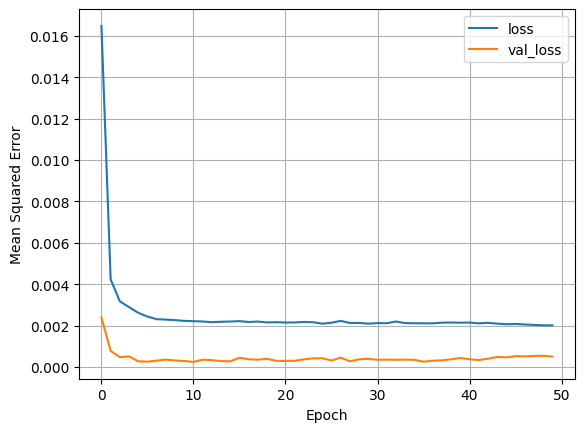

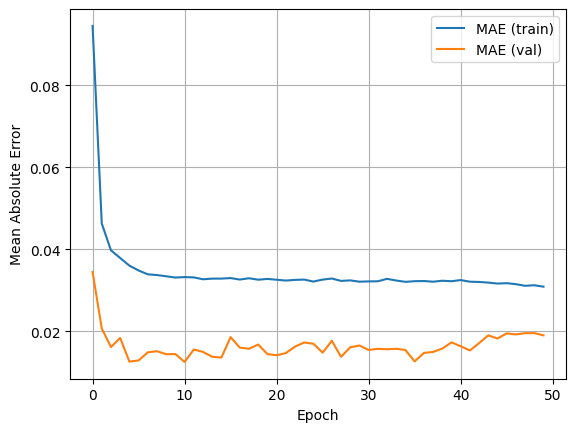

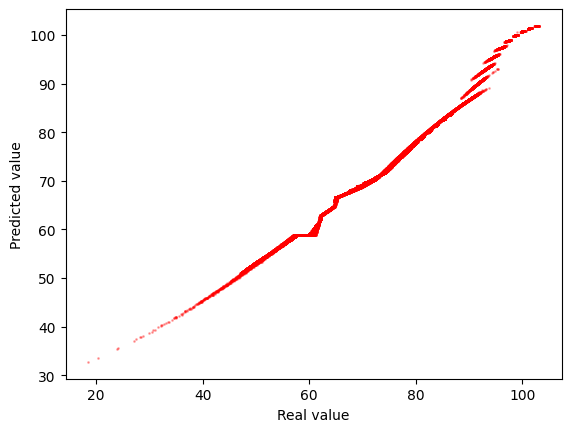

In [ ]:
y_pred_scaled = model.predict(X_train)                  # taking the predicted data by the NN

y_pred = scaler_y.inverse_transform(y_pred_scaled)      # and scaling it back to their "numeric values" (valorile pe care le dorim de fapt)


plot_loss(history)                                      # we plot how well our NN learned
plot_mae(history)

plt.scatter(train_data['time_till_death'],y_pred,color='red',s=1,alpha=0.3)
plt.xlabel('Real value')
plt.ylabel('Predicted value')
plt.show()

1435/1435 ━━━━━━━━━━━━━━━━━━━━ 1s 826us/step


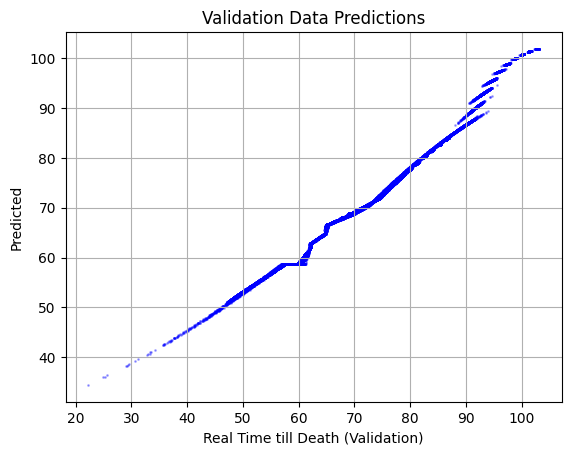

In [ ]:
# testing on our validation data using the model

X_valid = valid_data[['vibration', 'wconfid', 'pctid']]
y_valid_real = valid_data[['time_till_death']]

y_valid_pred_scaled = model.predict(X_valid)
y_valid_pred = scaler_y.inverse_transform(y_valid_pred_scaled)

plt.scatter(y_valid_real, y_valid_pred, color='blue', alpha=0.3, s=1)
plt.xlabel('Real Time till Death (Validation)')
plt.ylabel('Predicted')
plt.title('Validation Data Predictions')
plt.grid(True)
plt.show()


1435/1435 ━━━━━━━━━━━━━━━━━━━━ 1s 726us/step


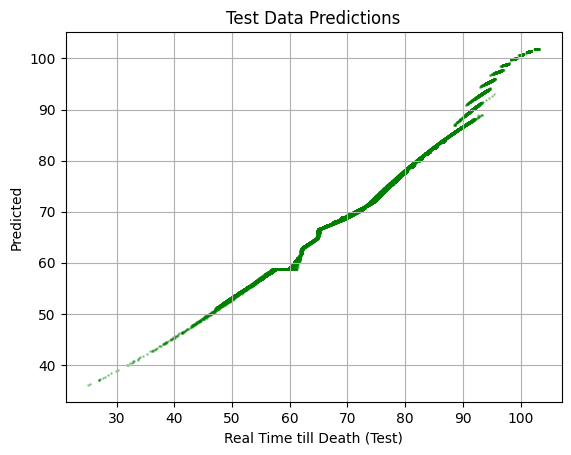

In [ ]:
# testing on the rest of data

X_test = test_data[['vibration', 'wconfid', 'pctid']]
y_test_real = test_data[['time_till_death']]

y_test_pred_scaled = model.predict(X_test)
y_test_pred = scaler_y.inverse_transform(y_test_pred_scaled)

plt.scatter(y_test_real, y_test_pred, color='green', alpha=0.3, s=1)
plt.xlabel('Real Time till Death (Test)')
plt.ylabel('Predicted')
plt.title('Test Data Predictions')
plt.grid(True)
plt.show()


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

print("Validation MAE:", mean_absolute_error(y_valid_real, y_valid_pred))
print("Test MAE:", mean_absolute_error(y_test_real, y_test_pred))

# we do not overfitted or underfitted
# i experimented with more/less neurons, batch sizes or epochs
# having fewer input data than usual, the model can very easy overfit => that means we cannot generalise

Validation MAE: 1.603155493736267
Test MAE: 1.6014773845672607
